<a href="https://colab.research.google.com/github/manalfarouq/Classification-d-Images-avec-un-Reseau-Neuronal/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Charger Fashion MNIST via Tensorflow.keras.datasets.

In [13]:
!pip install -q -U tensorflow>=1.8.0

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


#### Inspecter dimensions, classes.

In [14]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Text(0.5, 1.0, 'Label: 5')

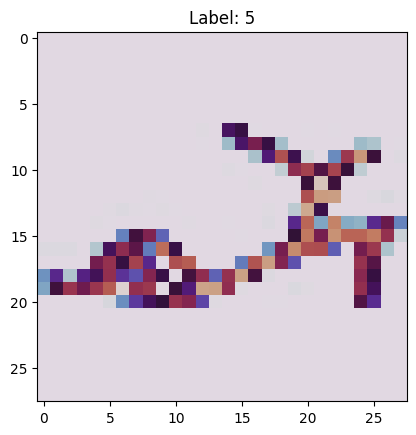

In [15]:
img_index = 593
plt.imshow(x_train[img_index],cmap="twilight")
plt.title("Label: {}".format(y_train[img_index]))

#### Normaliser les pixels (diviser par 255 → valeurs dans [0,1])

In [16]:
# Normalisation entre 0 et 1
# x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#### Choix du format des labels : Utilisation des labels entiers(0–9) et la loss sparse_categorical__crossentropy

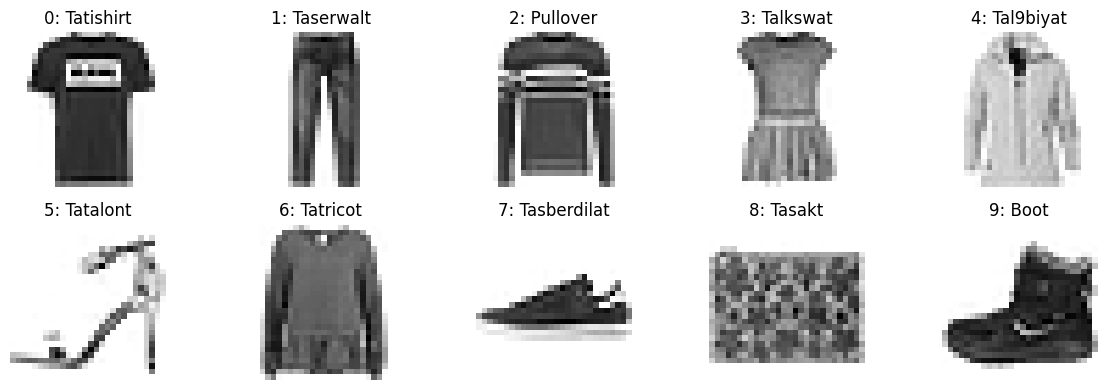

In [17]:
import numpy as np


# Dictionnaire des classes (pour les titres)
class_names = ['Tatishirt',       # label 0
               'Taserwalt',       # label 1
               'Pullover',        # label 2
               'Talkswat',        # label 3
               'Tal9biyat',       # label 4
               'Tatalont',        # label 5
               'Tatricot',        # label 6
               'Tasberdilat',     # label 7
               'Tasakt',          # label 8
               'Boot']            # label 9


# Récupérer le label correspondant à l’image
label_index = y_train[img_index]

# # Afficher l'information
# print("y =", label_index, "->", class_names[label_index])

# # Afficher l’image correspondante
# plt.figure(figsize=(4, 4))
# plt.imshow(x_train[img_index], cmap="gray_r")
# plt.title(f"Label: {class_names[label_index]}")


plt.figure(figsize=(12, 4))

for label in range(10):
    img_index = np.where(y_train == label)[0][0]
    plt.subplot(2, 5, label + 1)
    plt.imshow(x_train[img_index], cmap='gray_r')
    plt.title(f"{label}: {class_names[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


->Train (données d’entraînement): Utilisé pour apprendre : le modèle ajuste ses poids en fonction de ces données.



->Validation (données de validation): Utilisé pour ajuster les hyperparamètres du modèle (nombre de couches, filtres, taux d’apprentissage, etc.).

->Test (données de test):Utilisé après l’entraînement et la validation pour évaluer la performance finale.

In [18]:
# Séparer une partie pour la validation
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# Redimensionner les images
# Les CNN attendent des images avec une dimension supplémentaire (canal = 1 pour images en niveaux de gris)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0],  28, 28, 1)

# Encodage one-hot des labels
# Chaque label entier (0–9) devient un vecteur de taille 10
# Exemple : le label "3" devient [0,0,0,1,0,0,0,0,0,0]
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_valid_onehot = tf.keras.utils.to_categorical(y_valid, 10)
y_test_onehot  = tf.keras.utils.to_categorical(y_test, 10)

# Vérification des dimensions
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

print("Exemple y_train[0] :", y_train[0])
print("Exemple y_train_onehot[0] :", y_train_onehot[0])


x_train shape: (55000, 28, 28, 1) y_train shape: (55000,)
55000 train set
5000 validation set
10000 test set
Exemple y_train[0] : 4
Exemple y_train_onehot[0] : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [19]:
model = tf.keras.Sequential()

In [20]:

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath='model.weights.best.keras',
    verbose=1,
    save_best_only=True
)

# Entraînement du modèle
Entrai_model = model.fit(
    x_train,
    y_train_onehot,
    batch_size=64,
    epochs=10,
    validation_data=(x_valid, y_valid_onehot),
    callbacks=[checkpointer]
)

Epoch 1/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6857 - loss: 0.8370
Epoch 1: val_loss improved from inf to 0.39208, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6859 - loss: 0.8365 - val_accuracy: 0.8656 - val_loss: 0.3921
Epoch 2/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8467 - loss: 0.4273
Epoch 2: val_loss improved from 0.39208 to 0.35206, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 79s 87ms/step - accuracy: 0.8467 - loss: 0.4273 - val_accuracy: 0.8746 - val_loss: 0.3521
Epoch 3/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8653 - loss: 0.3767
Epoch 3: val_loss improved from 0.35206 to 0.29045, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 73s 85ms/step - accuracy: 0.8653 - loss: 0.3767 - val_accuracy: 0.8956 - val_loss: 0.2904
Epoch 4/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8756 - loss: 0.3422
Epoch 4: val_loss im

In [11]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.keras')

In [12]:
# Évaluer le modèle sur le jeu de test
score_model = model.evaluate(x_test, y_test_onehot, verbose=0)

# Afficher la loss et l'accuracy
print('\nTest loss:', score_model[0])
print('Test accuracy:', score_model[1])


Test loss: 0.2448149472475052
Test accuracy: 0.9100000262260437
